In [1]:
import pandas as pd

In [2]:
df=pd.read_csv ("dataframe.csv")
df.head()

,segment_name,md5,program,from_date
0,stranger,12b6f16303d3d4cd13399a022017ba04,oferting,2017-09-07 00:00:00.000000
1,frequent openers,d3b455bdfcc59b969e11c6da7343687e,oferting,2017-09-07 00:00:00.000000
2,halfslept,298daac4d5cdd12f8a3c1568572c0303,oferting,2017-09-07 00:00:00.000000
3,new,24c28d79903dc59ce460abd7ff3587fe,oferting,2017-09-07 00:00:00.000000
4,preactivated,114284a36c0208b1c3930f17d4f7ee79,oferting,2017-09-07 00:00:00.000000


# 1. Cantidad de usuarios por grupo

In [3]:
df_segment_user=df.groupby("segment_name")["md5"].count()
df_segment_user.sort_values(inplace=True, ascending=False)
df_segment_user

segment_name
frequent openers    364
new                 155
clickers            130
stranger            117
halfslept            77
preactivated         67
total inactive       28
aop                  16
keepalive            13
reactivated          13
awaken               10
slept                10
Name: md5, dtype: int64

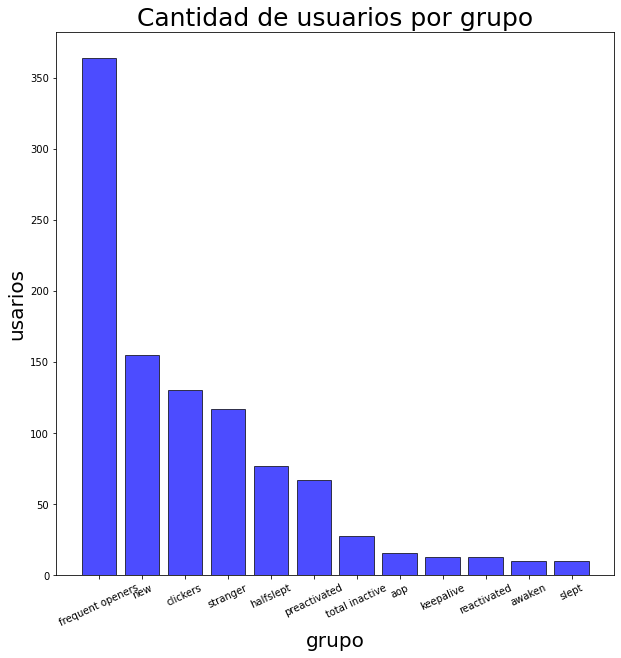

In [4]:
#visualizacion
import matplotlib.pyplot as plt

x=df_segment_user.index 
y=df_segment_user.values

#width = 0.9  
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(x, y,alpha=0.7,edgecolor='black',color='blue')

ax.set_ylabel('usarios', fontsize=20)
ax.set_xlabel('grupo', fontsize=20)
ax.set_title('Cantidad de usuarios por grupo', fontsize = 25)

plt.xticks(rotation=25,fontsize=10)
plt.savefig('Cantidad de usuarios por grupo.png')
plt.show()

# 2. Agrupar los usuarios por grupo y fecha (mm/yy)

In [5]:
df['mm-yy'] = pd.to_datetime(df['from_date']).dt.strftime('%m-%Y')
df_grupo_fecha=df.groupby(["segment_name","mm-yy"]).count().reset_index()
df_grupo_fecha

,segment_name,mm-yy,md5,program,from_date
0,aop,09-2017,16,16,16
1,awaken,09-2017,10,10,10
2,clickers,09-2017,130,130,130
3,frequent openers,09-2017,364,364,364
4,halfslept,09-2017,77,77,77
5,keepalive,09-2017,13,13,13
6,new,09-2017,155,155,155
7,preactivated,09-2017,67,67,67
8,reactivated,09-2017,13,13,13
9,slept,09-2017,10,10,10


In [6]:
#es igual al anterior, todos los datos son de 09/2017

# 3. Programa al que pertenecen.

In [7]:
dummy=pd.get_dummies(df["program"])
df=pd.concat([df,dummy],axis=1)
df_seg=df.groupby(["segment_name"]).sum().reset_index()
df_seg

,segment_name,clicplan,couponandgo,oferting
0,aop,4,9,3
1,awaken,4,1,5
2,clickers,22,85,23
3,frequent openers,91,202,71
4,halfslept,17,43,17
5,keepalive,5,8,0
6,new,72,30,53
7,preactivated,11,29,27
8,reactivated,8,3,2
9,slept,6,4,0


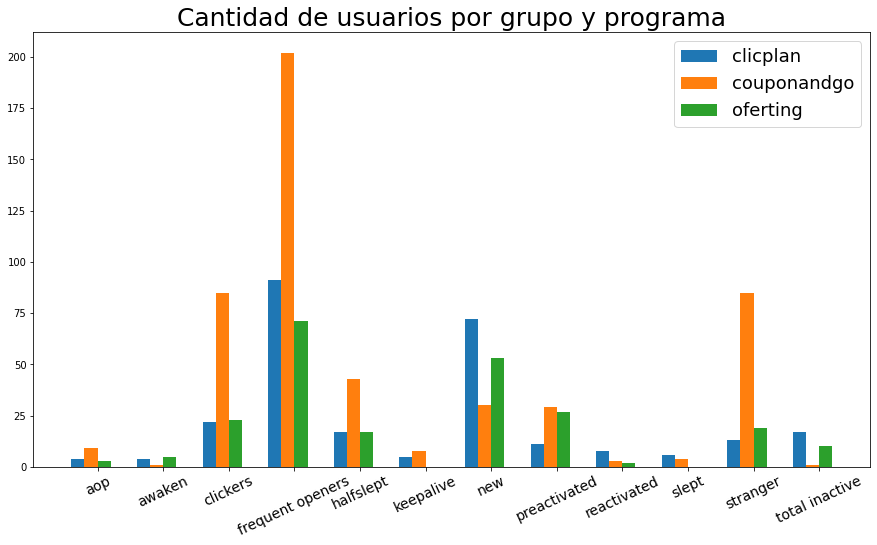

In [9]:
# Import Library

import numpy as np 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(15, 8))
# Define Data
group =df_seg["segment_name"].values

x_axis = np.arange(len(group))

for i in range(1,df_seg.shape[1]):
    c1 = df_seg.iloc[:,i].values
    plt.bar(x_axis+0.2*i, c1, width=0.2, label = df_seg.columns[i])

# Xticks
plt.xticks(x_axis+0.5, group,rotation=25,fontsize=14)

# Add legend
plt.legend(fontsize=18)

ax.set_title('Cantidad de usuarios por grupo y programa', fontsize = 25)
plt.savefig('Programa al que pertenecen.png')

# Display
plt.show()